# Access FLUXCOM-X-BASE products

This notebook shows an example how to access FLUXCOM-X-BASE products for different aggregation modes which will be explained below. X-BASE contains four flux variables:

- **NEE** — Net Ecosystem Exchange
- **GPP** — Gross Primary Productivity
- **ET** — Evapotranspiration
- **ET_T** — Transpiration

To improve usability, the data is available through:

✅ Native resolution via cloud-optimized access (spatial/temporal subsetting)
✅ Pre-computed spatial & temporal aggregations


### Native Full-Resolution Dataset

- **005_hourly** — 0.05° spatial and hourly temporal resolution for 2001–2021 (~3 TB)

Each dataset has dimensions `(time, hour, lat, lon)` and includes a `land_fraction` variable.

The data is stored in **Zarr** format on a publicly accessible object storage hosted by
[DKRZ](https://www.dkrz.de/en/dkrz-partner-for-climate-research?set_language=en).
It is **cloud-optimized**, allowing efficient spatial and temporal subsetting.
No authentication is required to access the dataset.


### Aggregated Products

All aggregated datasets are distributed through the
[ICOS ERIC Carbon Portal](https://meta.icos-cp.eu/collections/zfwf1Ak2I7OlziGDTX8Xl6_T)
(CC BY-4.0 license) in NetCDF format.

Current aggregations:

| Dataset              | Spatial Resolution | Temporal Resolution        | Size per Year | Dimensions |
|----------------------|--------------------|----------------------------|---------------|------------|
| **050_monthly**      | 0.5°               | Monthly                    | ~5 MB         |`(time, lat, lon)`|
| **025_monthlycycle** | 0.25°              | Monthly mean diurnal cycle | ~270 MB       |`(time, hour, lat, lon)`|
| **025_daily**        | 0.25°              | Daily                      | ~380 MB       |`(time, lat, lon)`|
| **005_monthly**      | 0.05°              | Monthly                    | ~450 MB       |`(time, lat, lon)`|

All files include `land_fraction`.

The aggregated products are available exclusively through the [ICOS Data Portal](https://www.icos-cp.eu/data-services/about-data-portal).  
To access them, users must [create an account](https://cpauth.icos-cp.eu/login/?targetUrl=https%3A%2F%2Fwww.icos-cp.eu%2Fdata-services%2Fabout-data-portal)
and provide their registered email address and password to the data store.  Note that 
the authentication process does **not** support lazy loading of the dataset. Therefore, 
the data must be **preloaded**, which involves downloading the global annual datasets 
and constructing a 3-D data cube from them.


## Setup
In order to run this notebook, you need to install [`xcube_icosdp`](https://github.com/xcube-dev/xcube-icosdp), following the [README](../README.md).

Note that [`xcube_icosdp`](https://github.com/xcube-dev/xcube-icosdp) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [1]:
from xcube.core.store import new_data_store, get_data_store_params_schema

We can inspect the available parameters during store initialization in the following cell.

In [2]:
get_data_store_params_schema("icosdp")

We initialize a new data store. Note that email and password is only needed for the preloading of the aggregated datasets via the ICOS Data Portal. 

In [3]:
store = new_data_store(
    "icosdp",
    email="konstantin.ntokas@brockmann-consult.de",
    password="t5qm~hci|]itk",
)

The data IDs can be streamed by executing the following cell.

In [4]:
store.list_data_ids()

['FLUXCOM-X-BASE_NEE',
 'FLUXCOM-X-BASE_GPP',
 'FLUXCOM-X-BASE_ET',
 'FLUXCOM-X-BASE_ET_T']

We can describe the dataset using the `describe_data` method, as shown below. Note this describes the full-resolution dataset. 

In [5]:
store.describe_data("FLUXCOM-X-BASE_NEE")

---
## Open Full-Resolution Dataset

Next we can open the full-resolution dataset lazily. We can first view the available opening parameters, which can be added to the `open_data` method in the subsequent cell. 

In [6]:
open_params = store.get_open_data_params_schema()
open_params

We can now open the Net Ecosystem Exchange (NEE) dataset, where accessing the entire dataset is the default.

In [7]:
%%time
ds = store.open_data("FLUXCOM-X-BASE_NEE")
ds

CPU times: user 23.8 ms, sys: 2.66 ms, total: 26.5 ms
Wall time: 278 ms


<xarray.Dataset> Size: 19TB
Dimensions:        (time: 7670, hour: 24, lat: 3600, lon: 7200, nbnds: 2)
Coordinates:
  * time           (time) datetime64[ns] 61kB 2001-01-01 ... 2021-12-31
  * hour           (hour) float64 192B 0.0 1.0 2.0 3.0 ... 20.0 21.0 22.0 23.0
  * lat            (lat) float64 29kB 89.97 89.92 89.88 ... -89.88 -89.92 -89.97
  * lon            (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
    hour_bnds      (hour, nbnds) int64 384B dask.array<chunksize=(24, 2), meta=np.ndarray>
    lat_bnds       (lat, nbnds) float64 58kB dask.array<chunksize=(40, 2), meta=np.ndarray>
    lon_bnds       (lon, nbnds) float64 115kB dask.array<chunksize=(40, 2), meta=np.ndarray>
Dimensions without coordinates: nbnds
Data variables:
    NEE            (time, hour, lat, lon) float32 19TB dask.array<chunksize=(1461, 24, 40, 40), meta=np.ndarray>
    land_fraction  (lat, lon) float64 207MB dask.array<chunksize=(40, 40), meta=np.ndarray>
Attributes: (12/26)
    contact:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    contributor:                ['Jacob Nelson https://orcid.org/0000-0002-46...
    conventions:                CF-1.8
    creation_date:              2023-11-17
    creator:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    crs:                        WGS 84 / Plate Carree
    ...                         ...
    publisher_url:              http://fluxcom.org/
    references:                 
    source:                     ['MODIS Reflectance 10.5067/MODIS/MCD43C2.006...
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        2001-01-01T00:00:00.000000000
    training_features:          ['TA', 'VPD', 'SW_IN', 'SW_IN_POT', 'dSW_IN_P...

We can also open a subset of the dataset by using the opening parameters `time_range` and `bbox`.

In [8]:
%%time
ds = store.open_data(
    "FLUXCOM-X-BASE_NEE",
    time_range=("2020-01-01", "2021-12-31"),
    bbox=[5, 45, 10, 50]
)
ds

CPU times: user 79.9 ms, sys: 18.7 ms, total: 98.6 ms
Wall time: 357 ms


<xarray.Dataset> Size: 702MB
Dimensions:        (time: 731, hour: 24, lat: 100, lon: 100, nbnds: 2)
Coordinates:
  * time           (time) datetime64[ns] 6kB 2020-01-01 ... 2021-12-31
  * hour           (hour) float64 192B 0.0 1.0 2.0 3.0 ... 20.0 21.0 22.0 23.0
  * lat            (lat) float64 800B 49.98 49.92 49.88 ... 45.12 45.08 45.02
  * lon            (lon) float64 800B 5.025 5.075 5.125 ... 9.875 9.925 9.975
    hour_bnds      (hour, nbnds) int64 384B dask.array<chunksize=(24, 2), meta=np.ndarray>
    lat_bnds       (lat, nbnds) float64 2kB dask.array<chunksize=(40, 2), meta=np.ndarray>
    lon_bnds       (lon, nbnds) float64 2kB dask.array<chunksize=(20, 2), meta=np.ndarray>
Dimensions without coordinates: nbnds
Data variables:
    NEE            (time, hour, lat, lon) float32 702MB dask.array<chunksize=(366, 24, 40, 20), meta=np.ndarray>
    land_fraction  (lat, lon) float64 80kB dask.array<chunksize=(40, 20), meta=np.ndarray>
Attributes: (12/26)
    contact:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    contributor:                ['Jacob Nelson https://orcid.org/0000-0002-46...
    conventions:                CF-1.8
    creation_date:              2023-11-17
    creator:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    crs:                        WGS 84 / Plate Carree
    ...                         ...
    publisher_url:              http://fluxcom.org/
    references:                 
    source:                     ['MODIS Reflectance 10.5067/MODIS/MCD43C2.006...
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        2001-01-01T00:00:00.000000000
    training_features:          ['TA', 'VPD', 'SW_IN', 'SW_IN_POT', 'dSW_IN_P...

As an example, we plot the Net Ecosystem Exchange (NEE) for a summer time-stamp below. Be aware that plotting the spatial domain may take a while, because the dataset is chunked mainly along time, which is optimized for efficient time series analysis.

CPU times: user 16.3 s, sys: 8 s, total: 24.3 s
Wall time: 2min 8s


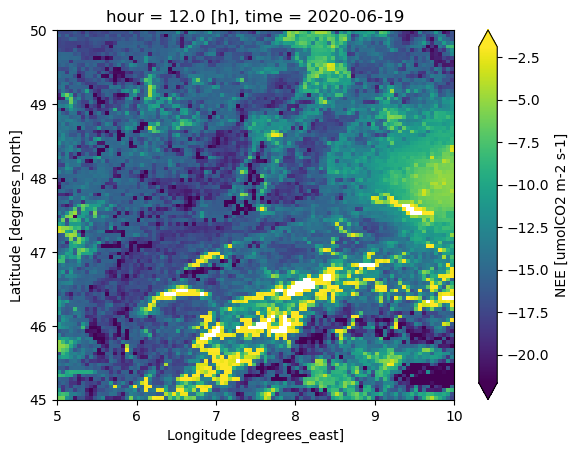

In [9]:
%%time
ds.NEE.isel(time=170, hour=12).plot(robust=True)

## Accessing the Aggregated Dataset

Next, we can access the aggregated dataset by preloading it. This process locates the annual global datasets, downloads them, and stacks them together into a single data cube that supports spatiotemporal subsetting. The resulting dataset is stored as a Zarr in the cache data store, which can be customized during store initialization. You can view the parameters available for the `preload_data` method in the following cell.

In [14]:
store.get_preload_data_params_schema()

In [10]:
%%time
cache_store = store.preload_data(
    "FLUXCOM-X-BASE_NEE",
    agg_mode="050_monthly",
    time_range=("2015-01-01", "2021-12-31"),
    bbox=[5, 45, 10, 50],
)

Data ID,Status,Progress,Message,Exception
FLUXCOM-X-BASE_NEE,COMPLETED,100%,Datacube written to 'FLUXCOM-X-BASE_NEE_monthly_2015_2021.zarr'.,-


CPU times: user 728 ms, sys: 321 ms, total: 1.05 s
Wall time: 7.42 s


The `preload_data` method returns the cache data store, which can then be used to access the data. This cache store functions like a regular data store. By default, it is a `"file"` datastore with `root="icospd_cache"`. It can be used to list the preloaded datasets; however, the corresponding data ID is also provided in the output table of the `preload_data` method.

In [11]:
cache_store.list_data_ids()

['FLUXCOM-X-BASE_NEE_monthly_2015_2021.zarr']

In [12]:
%%time
ds = cache_store.open_data("FLUXCOM-X-BASE_NEE_monthly_2015_2021.zarr")
ds

CPU times: user 10.1 ms, sys: 0 ns, total: 10.1 ms
Wall time: 9.64 ms


<xarray.Dataset> Size: 37kB
Dimensions:        (time: 84, lat: 10, lon: 10, hour: 24, nbnds: 2)
Coordinates:
  * time           (time) datetime64[ns] 672B 2018-01-01 ... 2016-12-01
  * lat            (lat) float64 80B 49.75 49.25 48.75 ... 46.25 45.75 45.25
  * lon            (lon) float64 80B 5.25 5.75 6.25 6.75 ... 8.25 8.75 9.25 9.75
    hour_bnds      (hour, nbnds) int64 384B dask.array<chunksize=(24, 2), meta=np.ndarray>
    lat_bnds       (lat, nbnds) float64 160B dask.array<chunksize=(10, 2), meta=np.ndarray>
    lon_bnds       (lon, nbnds) float64 160B dask.array<chunksize=(10, 2), meta=np.ndarray>
    time_bnds      (time, nbnds) datetime64[ns] 1kB dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: hour, nbnds
Data variables:
    NEE            (time, lat, lon) float32 34kB dask.array<chunksize=(12, 10, 10), meta=np.ndarray>
    land_fraction  (lat, lon) float64 800B dask.array<chunksize=(10, 10), meta=np.ndarray>
Attributes: (12/29)
    Full_resolution_data:       Visit the dataset documentation at https://gi...
    contact:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    contributor:                ['Jacob Nelson https://orcid.org/0000-0002-46...
    conventions:                CF-1.8
    creation_date:              2023-11-09
    creator:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    ...                         ...
    references:                 
    source:                     ['MODIS Reflectance 10.5067/MODIS/MCD43C2.006...
    summary:                    X-BASE NEE is based on the FLUXCOM-X framewor...
    time_coverage_end:          2021-12-01T00:00:00.000000000
    time_coverage_start:        2001-01-01T00:00:00.000000000
    training_features:          ['TA', 'VPD', 'SW_IN', 'SW_IN_POT', 'dSW_IN_P...

CPU times: user 28.3 ms, sys: 1.41 ms, total: 29.7 ms
Wall time: 29 ms


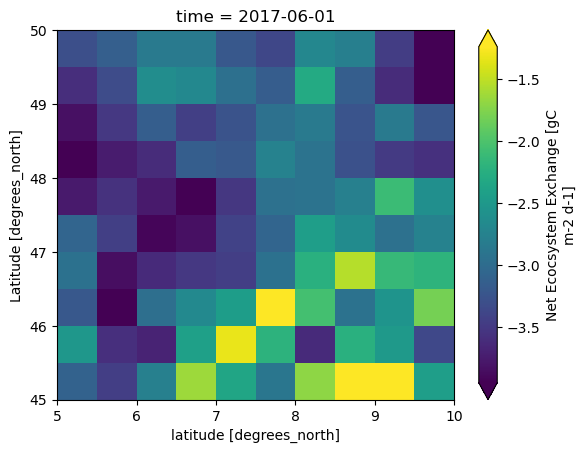

In [13]:
%%time
ds.NEE.isel(time=17).plot(robust=True)